# 平面机械臂（Planar Manipulator）

In [1]:
# 导入Python库
import mpld3
import numpy as np

from manipulation import running_as_notebook
from manipulation.exercises.pick.plot_planar_manipulator import (
    plot_planar_manipulator,
    plot_two_planar_manipulators,
)

# 启用mpld3以便在notebook中交互式显示图形
if running_as_notebook:
    mpld3.enable_notebook()

## 问题描述

在课程中，我们学习了正运动学和微分逆运动学。本练习中，你将通过简单的几何推理推导一个简单的两连杆平面机械臂的相关方程。正如优秀的玩具问题一样，两连杆机械臂虽然简单，但其原理对多连杆系统同样适用，蕴含着丰富的启示。

**学习目标：**

1. 计算两连杆机械臂的正运动学。

2. 计算两连杆机械臂的逆运动学。

3. 理解在多连杆情况下正、逆运动学的变化。

4. 推导正运动学映射的雅可比矩阵（Jacobian）。

5. 分析雅可比矩阵奇异（不可逆）的条件。

# 两连杆平面机械臂

两连杆平面机械臂是机械臂运动学与动力学中非常经典的玩具问题。下图展示了两连杆机械臂的坐标描述：

<img src="https://raw.githubusercontent.com/RussTedrake/manipulation/master/book/figures/exercises/planar_two_link.png" width="700">

## 正运动学（Forward Kinematics）

通常，运动学研究的是机器人各坐标系与关节角之间的映射。正运动学是指从关节角推导出机器人各部分（如末端执行器）在空间中的位置。本题中，我们只需计算末端执行器的二维位置。按照教材中引入的[单字母记号](https://drake.mit.edu/doxygen_cxx/group__multibody__quantities.html)，即写出红点相对于绿色坐标系的二维位置 ${}^A p^C$，其为关节角 $(q_0, q_1)$ 的函数。

**下面请你写出该机械臂的正运动学表达式。假设两节臂长均为L=1.0米。**

注意：你可以用 `np.sin()` 和 `np.cos()` 实现三角函数。

提示：如果你能写出蓝点相对于绿色坐标系的二维位置 ${}^A p^B$（$q_0$的函数），以及红点相对于蓝点的二维位置 ${}^B p^C$（$q_1$的函数），那么你能否写出 ${}^A p^C$？

In [2]:
def forward_kinematics(q: np.ndarray, L=1) -> np.ndarray:

    q0 = q[0]  # 第一个关节角

    q1 = q[1]  # 第二个关节角

    x = 0  # 在此填写你的代码，计算末端执行器的x坐标
    x += np.cos(q0) * L
    x += np.cos(q0 + q1) * L

    y = 0  # 在此填写你的代码，计算末端执行器的y坐标
    y += np.sin(q0) * L
    y += np.sin(q0 + q1) * L
    return np.array([x, y])  # 返回末端执行器的二维位置

我们为你提供了一个函数，可以绘制机械臂和二维空间中的x-y位置，帮助你验证推导是否正确，或调试可能出现的问题。

下面，如果你计算得到的x标记（正运动学结果）与红色标记（实际末端位置）重合，则说明你的实现是正确的。你可以多次运行，测试不同的关节角。

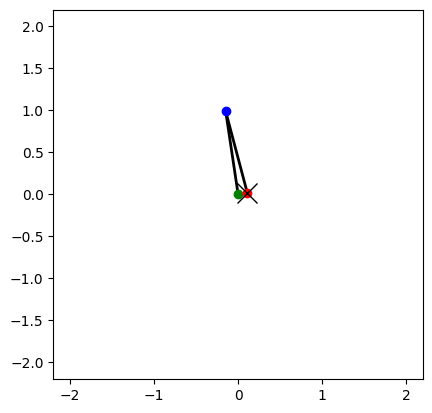

In [3]:
q = 2 * np.pi * np.random.rand(2)  # 随机生成两个关节角（0~2π）

plot_planar_manipulator(q, forward_kinematics(q))  # 绘制机械臂和末端位置

## 逆运动学（Inverse Kinematics, IK）

逆运动学是指从机器人某一坐标系的位置反推关节角。本节我们关注如何求解给定末端执行器位置 ${}^A p^C$ 时的关节角 $(q_0, q_1)$。在实际中，逆运动学通常比正运动学更难求解。

对于两连杆平面机械臂，可以解析地推导逆运动学。对于本题，建议先求解关节角 $q_1$，再由 $q_1$ 推出 $q_0$。

**下面请你求出能达到目标末端位置 [$x$, $y$] 的两个不同的 $q_1$ 解。$q_0$ 的解已为你实现。假设两节臂长均为L=1.0米。**

提示：先写出 $r^2 = x^2 + y^2$，并代入你上面推导的正运动学表达式。

提示：回忆三角恒等式[和差公式](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Angle_sum_and_difference_identities)

## 逆运动学推导

**第一步：求解 $\theta_2$**

将正运动学方程两式平方后相加：

$$
x^2 + y^2 = [\cos\theta_1 + \cos(\theta_1 + \theta_2)]^2 + [\sin\theta_1 + \sin(\theta_1 + \theta_2)]^2
$$

展开右边，利用三角恒等式 $\cos^2\alpha + \sin^2\alpha = 1$：

$$
x^2 + y^2 = 1 + 2\cos\theta_1\cos(\theta_1 + \theta_2) + 1 + 2\sin\theta_1\sin(\theta_1 + \theta_2)
$$

$$
x^2 + y^2 = 2 + 2[\cos\theta_1\cos(\theta_1 + \theta_2) + \sin\theta_1\sin(\theta_1 + \theta_2)]
$$

利用余弦差角公式 $\cos(A-B) = \cos A \cos B + \sin A \sin B$：

$$
x^2 + y^2 = 2 + 2\cos[(\theta_1 + \theta_2) - \theta_1] = 2 + 2\cos\theta_2
$$

因此：

$$
\cos\theta_2 = \frac{x^2 + y^2 - 2}{2}
$$

这给出 $\theta_2$ 的两个解：

$$
\theta_2 = \pm \arccos\left(\frac{x^2 + y^2 - 2}{2}\right)
$$

---

**第二步：求解 $\theta_1$**

正运动学方程：

$$
x = \cos\theta_1 + \cos(\theta_1 + \theta_2) \\
y = \sin\theta_1 + \sin(\theta_1 + \theta_2)
$$

展开三角函数：

$$
x = \cos\theta_1 + \cos\theta_1\cos\theta_2 - \sin\theta_1\sin\theta_2 \\
y = \sin\theta_1 + \sin\theta_1\cos\theta_2 + \cos\theta_1\sin\theta_2
$$

整理得：

$$
x = \cos\theta_1(1 + \cos\theta_2) - \sin\theta_1\sin\theta_2 \\
y = \sin\theta_1(1 + \cos\theta_2) + \cos\theta_1\sin\theta_2
$$

令 $R = 1 + \cos\theta_2$，$S = \sin\theta_2$，则：

$$
x = R\cos\theta_1 - S\sin\theta_1 \\
y = S\cos\theta_1 + R\sin\theta_1
$$

这可以写成：

$$
\sqrt{R^2 + S^2} \cos(\theta_1 + \varphi) = x \\
\sqrt{R^2 + S^2} \sin(\theta_1 + \varphi) = y
$$

其中 $\varphi = \arctan2(S, R) = \arctan2(\sin\theta_2, 1 + \cos\theta_2)$。

因此：

$$
\theta_1 + \varphi = \arctan2(y, x) \\
\theta_1 = \arctan2(y, x) - \arctan2(\sin\theta_2, 1 + \cos\theta_2)
$$

---

**完整解：**

- $\theta_2$ 的两个解：
    - $\theta_{2,1} = +\arccos\left(\frac{x^2 + y^2 - 2}{2}\right)$（肘部向上）
    - $\theta_{2,2} = -\arccos\left(\frac{x^2 + y^2 - 2}{2}\right)$（肘部向下）

- 对应的 $\theta_1$ 解：
    - $\theta_{1,1} = \arctan2(y, x) - \arctan2(\sin\theta_{2,1}, 1 + \cos\theta_{2,1})$
    - $\theta_{1,2} = \arctan2(y, x) - \arctan2(\sin\theta_{2,2}, 1 + \cos\theta_{2,2})$

In [4]:
def inverse_kinematics(x: float, y: float) -> tuple[np.ndarray, np.ndarray]:
    """
    求解二连杆机器人的逆运动学问题
    
    假设：
    - 两个连杆长度均为1
    - 第一个关节在原点，第二个关节相对于第一个连杆末端
    - 目标位置为(x, y)
    
    参数：
        x: 目标位置的x坐标
        y: 目标位置的y坐标
    
    返回：
        两组关节角度解：(q1_0, q1_1) 和 (q2_0, q2_1)
        其中 q_0 是基座关节角，q_1 是第二关节角
    """
    # 这里，qa_b 表示第a组解的第b个关节角

    ## TODO: 求解能达到目标末端位置的两个不同的 q_1 解

    # q1_1 = 0  # TODO: 在此填写你的代码，解1的q1
    q1_1 = np.arccos((x**2 + y**2 - 2) / 2)
    # q2_1 = 0  # TODO: 在此填写你的代码，解2的q1
    q2_1 = -np.arccos((x**2 + y**2 - 2) / 2)

    # q_0 的解已为你实现，无需修改

    q1_0 = np.arctan2(y, x) - np.arctan2(np.sin(q1_1), 1 + np.cos(q1_1))

    q2_0 = np.arctan2(y, x) - np.arctan2(np.sin(q2_1), 1 + np.cos(q2_1))



    return (np.array([q1_0, q1_1]), np.array([q2_0, q2_1]))  # 返回两组解

下面是一个用于检查你答案的函数。如果你的答案正确，两组机械臂的红点都会与黑色X重合。你可以多次运行，测试不同的目标位置。

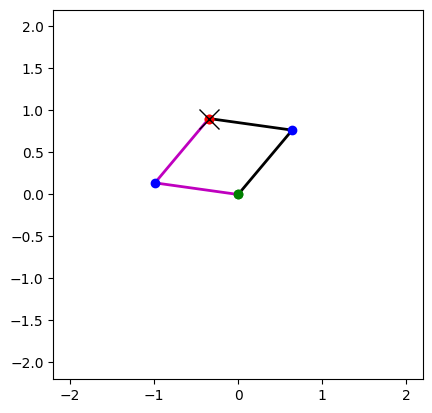

In [5]:
theta = 2 * np.pi * np.random.rand()  # 随机生成角度

r = 2 * np.random.rand()  # 随机生成半径（长度）

x = r * np.cos(theta)  # 目标末端x坐标

y = r * np.sin(theta)  # 目标末端y坐标

q1, q2 = inverse_kinematics(x, y)  # 求解两组逆运动学解

plot_two_planar_manipulators(q1, q2, np.array([x, y]))  # 绘制两组机械臂和目标点

对于两连杆平面机械臂，给定一个末端位置，存在且仅存在两组关节角解。

**现在思考：对于三连杆平面机械臂（二维空间，三节臂），给定一个末端位置 ${}^A p^C$，会有多少组不同的关节角解？请将你的答案填写在Gradescope（3.3）！** 

## 平移雅可比矩阵（Translational Jacobian）

现在我们已经有了正运动学函数，可以根据关节角得到末端执行器的位置：

$${}^Ap^C=f(q),$$

接下来我们的任务是推导该机械臂的平移雅可比矩阵。正如课程所述，平移[雅可比矩阵](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)描述了末端位置对关节角变化的敏感性：

$$d {}^Ap^C=\frac{\partial f(q)}{\partial q} dq = \mathbf{J}(q) dq.$$

如果你不熟悉向量微积分，可以更明确地写为：

$$

\mathbf{J}(q)=\frac{\partial f(q)}{\partial q} = \begin{bmatrix} 
\partial x/\partial q_0 & \partial x/\partial q_1 \\ 
\partial y/\partial q_0 & \partial y/\partial q_1 \end{bmatrix}.

$$

建议你熟悉这些推导，因为它们在机器人问题中非常常见！

**下面请你根据上面推导的正运动学，写出2x2的雅可比矩阵。**

由正运动学表达式：
$$
x = L\cos q_0 + L\cos(q_0 + q_1) \\
y = L\sin q_0 + L\sin(q_0 + q_1)
$$

对 $q_0$ 和 $q_1$ 求偏导，得到雅可比矩阵：

$$
\mathbf{J}(q) = \begin{bmatrix}
\frac{\partial x}{\partial q_0} & \frac{\partial x}{\partial q_1} \\
\frac{\partial y}{\partial q_0} & \frac{\partial y}{\partial q_1}
\end{bmatrix}
= 
\begin{bmatrix}
-L\sin q_0 - L\sin(q_0 + q_1) & -L\sin(q_0 + q_1) \\
L\cos q_0 + L\cos(q_0 + q_1) & L\cos(q_0 + q_1)
\end{bmatrix}
$$

其中 $L=1$ 时可简化为：

$$
\mathbf{J}(q) = \begin{bmatrix}
-\sin q_0 - \sin(q_0 + q_1) & -\sin(q_0 + q_1) \\
\cos q_0 + \cos(q_0 + q_1) & \cos(q_0 + q_1)
\end{bmatrix}
$$

In [6]:
def Jacobian(q: np.ndarray) -> np.ndarray:

    q0 = q[0]  # 第一个关节角
    
    q1 = q[1]  # 第二个关节角

    J = np.array(
        [

            # [0.0, 0.0],  # 在此填写你的代码，第一行分别为dx/dq0, dx/dq1

            # [0.0, 0.0],  # 在此填写你的代码，第二行分别为dy/dq0, dy/dq1
            [-np.sin(q0) - np.sin(q0 + q1), -np.sin(q0 + q1)],
            [np.cos(q0) + np.cos(q0 + q1), np.cos(q0 + q1)] 
        ]

    )

    return J  # 返回雅可比矩阵

关于雅可比矩阵有一个很有启发性的分析——在什么情况下我们无法对雅可比矩阵求逆，从而无法通过末端速度反推关节速度？教材中提到，可以通过雅可比矩阵分析机械臂的**运动学奇异性**，请你明确分析这些奇异性出现的条件。

**哪些 $(q_0, q_1)$ 的取值会导致雅可比矩阵不可逆？（即本机械臂的运动学奇异点在哪里？）**

提示：你应该能识别出两类典型的奇异构型。

注意：如果你正确识别了答案，请思考在Kuka机械臂远距离操作时出现的错误，是否与此本质相关？

/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10502/4006749487.py:22: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAP

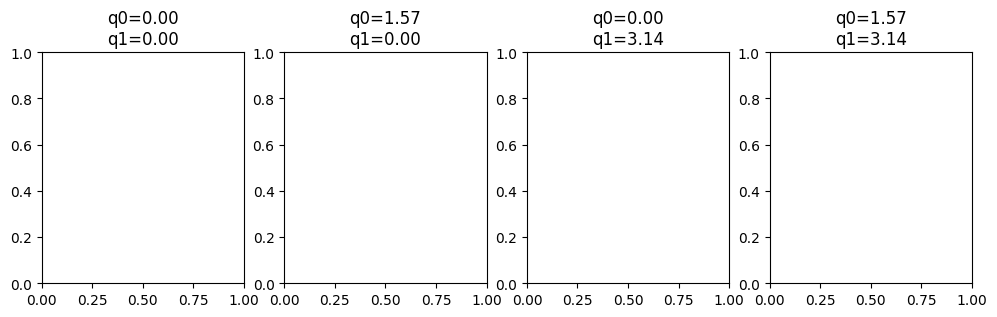

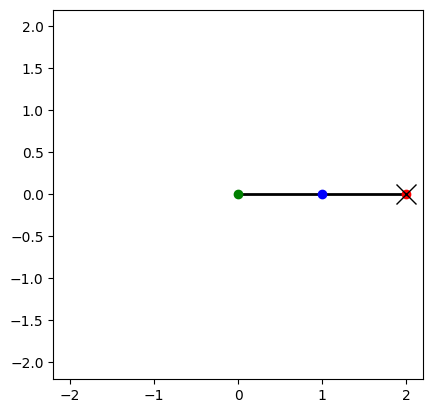

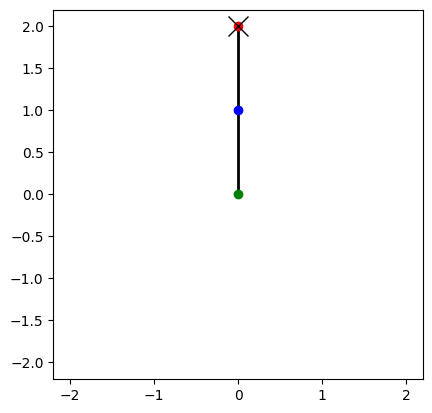

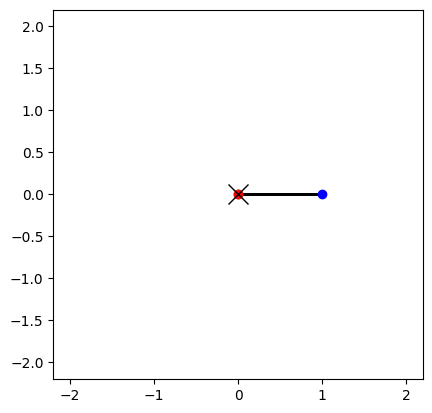

/home/lvxiangyu11/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lvxiangyu11/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lvxiangyu11/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lvxiangyu11/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lvxiangyu11/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26500 (\N{CJK U

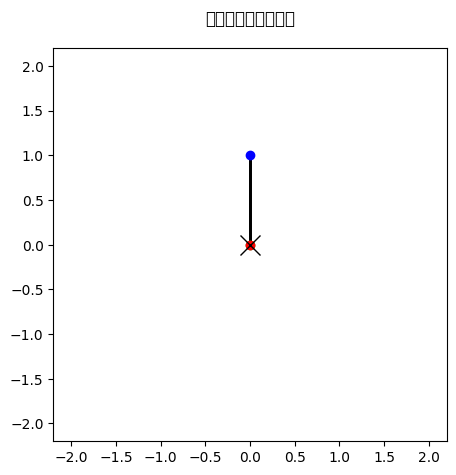

In [8]:
# 识别两连杆平面机械臂的奇异点（singularities）并可视化

import matplotlib.pyplot as plt

# 典型的两类奇异点：
# 1. 机械臂完全伸直（q1 = 0），两连杆共线
# 2. 机械臂完全折叠（q1 = pi 或 -pi），两连杆重叠

singular_configs = [
    np.array([0.0, 0.0]),         # 完全伸直
    np.array([np.pi/2, 0.0]),     # 伸直但基座旋转
    np.array([0.0, np.pi]),       # 完全折叠
    np.array([np.pi/2, np.pi]),   # 折叠但基座旋转
]

fig, axs = plt.subplots(1, len(singular_configs), figsize=(12, 3))
for i, q_sing in enumerate(singular_configs):
    ax = axs[i]
    plot_planar_manipulator(q_sing, forward_kinematics(q_sing))
    ax.set_title(f"q0={q_sing[0]:.2f}\nq1={q_sing[1]:.2f}")
plt.suptitle("典型奇异构型可视化")
plt.tight_layout()
plt.show()

---

# GRADESCOPE 验证环节

**前提：** 你必须完成上面所有TODO，下面的验证练习才能正常运行！

**说明：** 请实现下列练习，并将精确到小数点后4位的数值结果复制粘贴到Gradescope作为验证答案。

## 验证1：正运动学

**任务：** 计算两连杆平面机械臂在如下关节角下的正运动学：

- $q_0 = 0.3$

- $q_1 = 0.2$

**问题：** 对于上述关节角，末端执行器的位置 $(x, y)$ 是多少？

In [ ]:
q = np.array([0.3, 0.2])  # 指定关节角

x, y = forward_kinematics(q)  # 计算末端位置

print(f"x: {x}")  # 输出x坐标

print(f"y: {y}")  # 输出y坐标

x: 1.8329190510159787
y: 0.7749457452655426


## 验证2：逆运动学

**任务：** 计算当末端执行器位置为 $(x, y) = (-1, -0.5)$ 时，两连杆平面机械臂的逆运动学解

**问题：** 哪两组关节角能达到上述末端位置？

In [ ]:
x, y = (-1.0, -0.5)  # 指定末端位置

q1, q2 = inverse_kinematics(x, y)  # 计算逆运动学解

print(f"解1: {q1}")  # 输出第一组解

print(f"解2: {q2}")  # 输出第二组解

解1: [-3.6555416  1.9551931]
解2: [-1.70034849 -1.9551931 ]


## 验证3：平移雅可比矩阵

**任务：** 计算两连杆平面机械臂在关节角 $(q_0, q_1) = (0.3, 0.2)$ 时的雅可比矩阵

In [ ]:
j = Jacobian(np.array([0.3, 0.2]))  # 计算雅可比矩阵

print(f"dx/dq0: {j[0][0]}")  # 输出dx/dq0

print(f"dx/dq1: {j[0][1]}")  # 输出dx/dq1

print(f"dy/dq0: {j[1][0]}")  # 输出dy/dq0

print(f"dy/dq1: {j[1][1]}")  # 输出dy/dq1

dx/dq0: -0.7749457452655426
dx/dq1: -0.479425538604203
dy/dq0: 1.8329190510159787
dy/dq1: 0.8775825618903728


---

# 恭喜你！

你已成功完成**平面机械臂操作**练习！

**下一步：** 在Notebook 2中，你将练习刚体变换的计算，并学习如何为机械臂设计抓取位姿！